In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('255LoansTrainingSet.csv')
df = data.copy()
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


#**DATA CLEANING**

###Removing the Loan ID and Customer ID as we cant infer much from them


In [ ]:
df.drop(['Loan ID','Customer ID'], axis = 1,inplace = True)
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


###Moving the label col to the ed of dataset for ease of access

In [ ]:
df = df.iloc[:, 1:].join(df.iloc[:, 0])
df.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,Fully Paid
1,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0,Fully Paid
2,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0,Fully Paid
3,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0,Fully Paid
4,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0,Fully Paid


In [ ]:
df.shape

(256984, 17)

##NULL Values Identification and Treatment

In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
Current Loan Amount,0.000000
Term,0.000000
Credit Score,23.999938
Years in current job,4.465648
Home Ownership,0.000000
Annual Income,23.999938
Purpose,0.000000
Monthly Debt,0.000000
Years of Credit History,0.000000
Months since last delinquent,54.627136


In [ ]:
#Removing this col as it has hogh number of null values
df.drop(['Months since last delinquent'], axis = 1, inplace = True)
df.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,10,0,6760,16056,0.0,0.0,Fully Paid
1,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,17,0,6262,19149,0.0,0.0,Fully Paid
2,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,5,0,20967,28335,0.0,0.0,Fully Paid
3,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,9,0,22529,43915,0.0,0.0,Fully Paid
4,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,12,0,17391,37081,0.0,0.0,Fully Paid


In [ ]:
#calculate % and number of null values in the dataframe
null_counts = df.isnull().sum()

null_percentage = (df.isnull().sum() / len(df)) * 100

null_summary = pd.DataFrame({
    'Number of Nulls': null_counts,
    'Percentage of Nulls': null_percentage
})

print(null_summary)

                           Number of Nulls  Percentage of Nulls
Current Loan Amount                      0             0.000000
Term                                     0             0.000000
Credit Score                         61676            23.999938
Years in current job                 11476             4.465648
Home Ownership                           0             0.000000
Annual Income                        61676            23.999938
Purpose                                  0             0.000000
Monthly Debt                             0             0.000000
Years of Credit History                  0             0.000000
Number of Open Accounts                  0             0.000000
Number of Credit Problems                0             0.000000
Current Credit Balance                   0             0.000000
Maximum Open Credit                      0             0.000000
Bankruptcies                           529             0.205849
Tax Liens                               

In [ ]:
#Removing rows with null values from all cols other than credit score and annual income as they have high number of missing rows
subset=[col for col in df.columns if col not in ['Credit Score', 'Annual Income']]
df = df.dropna(subset=subset)
df.shape

(244979, 16)

####Analysing the Credit score and annual income column wrt Loan status

In [ ]:
df_subset = df.loc[:, ['Credit Score', 'Annual Income','Loan Status']]
df_subset.head()

,Credit Score,Annual Income,Loan Status
0,741.0,33694.0,Fully Paid
1,734.0,42269.0,Fully Paid
2,747.0,90126.0,Fully Paid
3,747.0,38072.0,Fully Paid
4,746.0,50025.0,Fully Paid


In [ ]:
#Checking correlation of Credit score and annual income to know how important they are and if we can remove them

df['Loan Status Numeric'] = df['Loan Status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

# Select relevant columns for correlation: 'Annual Income', 'Credit Score', and 'Loan Status Numeric'
df_subset = df[['Annual Income', 'Credit Score', 'Loan Status Numeric']]

# Drop rows with missing values in the selected columns
df_subset = df_subset.dropna()

# Calculate the correlation
correlation_matrix = df_subset.corr()

print(correlation_matrix)

                     Annual Income  Credit Score  Loan Status Numeric
Annual Income             1.000000     -0.031780             0.066473
Credit Score             -0.031780      1.000000            -0.441991
Loan Status Numeric       0.066473     -0.441991             1.000000


#####Annual income is not much related as the correlation is closer to 0. So we can remove it

In [ ]:
df.drop(['Annual Income'], axis = 1, inplace = True)
df.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status,Loan Status Numeric
0,11520,Short Term,741.0,10+ years,Home Mortgage,Debt Consolidation,$584.03,12.3,10,0,6760,16056,0.0,0.0,Fully Paid,1
1,3441,Short Term,734.0,4 years,Home Mortgage,other,"$1,106.04",26.3,17,0,6262,19149,0.0,0.0,Fully Paid,1
2,21029,Short Term,747.0,10+ years,Home Mortgage,Debt Consolidation,"$1,321.85",28.8,5,0,20967,28335,0.0,0.0,Fully Paid,1
3,18743,Short Term,747.0,10+ years,Own Home,Debt Consolidation,$751.92,26.2,9,0,22529,43915,0.0,0.0,Fully Paid,1
4,11731,Short Term,746.0,4 years,Rent,Debt Consolidation,$355.18,11.5,12,0,17391,37081,0.0,0.0,Fully Paid,1


In [ ]:
df.shape

(244979, 16)

In [ ]:
#removing it as this is a generated column and not necessary after that
df.drop('Loan Status Numeric',axis=1, inplace = True)

In [ ]:
df.shape

(244979, 15)

##### Proportion of rows if we remove credit score

In [ ]:
df.isnull().sum()

,0
Current Loan Amount,0
Term,0
Credit Score,58880
Years in current job,0
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0
Number of Open Accounts,0
Number of Credit Problems,0


In [ ]:
df.shape

(244979, 15)

In [ ]:
# for each column we have around 12406 rows for learning after removing the missing rows from Credit score. This is good amount for learning.
(df.shape[0]-df['Credit Score'].isnull().sum())/df.shape[1]

12406.6

In [ ]:
df.dropna(inplace = True)
df.shape

(186099, 15)

###Separating numeric and categorical cols

In [ ]:
nums = df.select_dtypes(include='number')
nums.head()

,Current Loan Amount,Credit Score,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
0,11520,741.0,12.3,10,0,6760,0.0,0.0
1,3441,734.0,26.3,17,0,6262,0.0,0.0
2,21029,747.0,28.8,5,0,20967,0.0,0.0
3,18743,747.0,26.2,9,0,22529,0.0,0.0
4,11731,746.0,11.5,12,0,17391,0.0,0.0


In [ ]:
cats = df.select_dtypes(exclude='number')
cats.head()

,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit,Loan Status
0,Short Term,10+ years,Home Mortgage,Debt Consolidation,$584.03,16056,Fully Paid
1,Short Term,4 years,Home Mortgage,other,"$1,106.04",19149,Fully Paid
2,Short Term,10+ years,Home Mortgage,Debt Consolidation,"$1,321.85",28335,Fully Paid
3,Short Term,10+ years,Own Home,Debt Consolidation,$751.92,43915,Fully Paid
4,Short Term,4 years,Rent,Debt Consolidation,$355.18,37081,Fully Paid


In [ ]:
cats.nunique()

,0
Term,2
Years in current job,11
Home Ownership,4
Purpose,10
Monthly Debt,109083
Maximum Open Credit,75826
Loan Status,2


In [ ]:
cols = cats.columns


for i in cols:
    print(cats[i].value_counts(),'\n')

Term
Short Term    138574
Long Term      47525
Name: count, dtype: int64 

Years in current job
10+ years    59973
2 years      17877
< 1 year     15806
3 years      15685
5 years      13549
1 year       12692
4 years      12144
6 years      11036
7 years      10486
8 years       9321
9 years       7530
Name: count, dtype: int64 

Home Ownership
Home Mortgage    90521
Rent             79298
Own Home         15878
HaveMortgage       402
Name: count, dtype: int64 

Purpose
Debt Consolidation      147974
Home Improvements        10723
other                    10207
Other                     6994
Business Loan             3437
Buy a Car                 2385
Medical Bills             1998
Take a Trip               1117
Buy House                 1093
Educational Expenses       171
Name: count, dtype: int64 

Monthly Debt
$0.00         166
$724.78        10
$1,095.88      10
$837.00         9
$910.08         9
             ... 
$483.86         1
$1,223.88       1
$1,440.94       1
$1,494.70  

#####From the above, we can assume that Monthly debt, max open credit and years in current job should have been numeric cols

In [ ]:
#Removing the $ sign from Monthly debt
cats['Monthly Debt'] = cats['Monthly Debt'].str.replace('$', '').astype(float)

ValueError: could not convert string to float: '1,106.04 '

######The above error tells us that along with $ this column aso has ','. Removing them too

In [ ]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace('$', '')
df['Monthly Debt'] = df['Monthly Debt'].str.replace(',', '').astype(float)

In [ ]:
nums = df.select_dtypes(include='number')
nums.head()

,Current Loan Amount,Credit Score,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
0,11520,741.0,584.03,12.3,10,0,6760,0.0,0.0
1,3441,734.0,1106.04,26.3,17,0,6262,0.0,0.0
2,21029,747.0,1321.85,28.8,5,0,20967,0.0,0.0
3,18743,747.0,751.92,26.2,9,0,22529,0.0,0.0
4,11731,746.0,355.18,11.5,12,0,17391,0.0,0.0


In [ ]:
cats.drop(['Monthly Debt'],axis = 1, inplace =True)

In [ ]:
cats.head()

,Term,Years in current job,Home Ownership,Purpose,Maximum Open Credit,Loan Status
0,Short Term,10+ years,Home Mortgage,Debt Consolidation,16056,Fully Paid
1,Short Term,4 years,Home Mortgage,other,19149,Fully Paid
2,Short Term,10+ years,Home Mortgage,Debt Consolidation,28335,Fully Paid
3,Short Term,10+ years,Own Home,Debt Consolidation,43915,Fully Paid
4,Short Term,4 years,Rent,Debt Consolidation,37081,Fully Paid


In [ ]:
cats['Maximum Open Credit'].astype(int)

ValueError: invalid literal for int() with base 10: '#VALUE!'

In [ ]:
#Replacing all the categotical values from original data soure
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace('#VALUE!', np.nan)
df.isnull().sum()

,0
Current Loan Amount,0
Term,0
Credit Score,0
Years in current job,0
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0
Number of Open Accounts,0
Number of Credit Problems,0


In [ ]:
#Dropping the rows from original dataset
df.dropna(inplace = True)
df.isnull().sum()

,0
Current Loan Amount,0
Term,0
Credit Score,0
Years in current job,0
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0
Number of Open Accounts,0
Number of Credit Problems,0


In [ ]:
#Converting the column to numeric
df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'])

In [ ]:
nums.nunique()

,0
Current Loan Amount,25538
Credit Score,334
Monthly Debt,109083
Years of Credit History,519
Number of Open Accounts,58
Number of Credit Problems,11
Current Credit Balance,42077
Maximum Open Credit,61892
Bankruptcies,8
Tax Liens,11


In [ ]:
#Checking for correlation of numeric cols to the label
nums.drop(['Loan Status','Loan Status'], axis = 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cats['Loan Status'] = le.fit_transform(cats['Loan Status'])
cats['Loan Status'].head()
cats['Loan Status'].shape
nums = pd.concat([nums,cats['Loan Status']],axis = 1)
nums.head()

nums.corr()

,Current Loan Amount,Credit Score,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status,Loan Status,Loan Status
Current Loan Amount,1.000000,-0.139221,-0.002816,0.019009,-0.004337,-0.000633,0.004337,0.006443,0.003900,-0.004753,0.314885,0.314885,0.314885
Credit Score,-0.139221,1.000000,0.007867,-0.014927,0.010723,-0.000313,-0.002834,-0.001919,-0.003782,0.003974,-0.441991,-0.441991,-0.441991
Monthly Debt,-0.002816,0.007867,1.000000,0.210500,0.406631,-0.046366,0.477574,0.021618,-0.070861,0.021017,-0.023866,-0.023866,-0.023866
Years of Credit History,0.019009,-0.014927,0.210500,1.000000,0.138098,0.058928,0.217969,0.019933,0.057924,0.021976,0.041691,0.041691,0.041691
Number of Open Accounts,-0.004337,0.010723,0.406631,0.138098,1.000000,-0.011537,0.227402,0.015437,-0.018102,0.002799,-0.026655,-0.026655,-0.026655
Number of Credit Problems,-0.000633,-0.000313,-0.046366,0.058928,-0.011537,1.000000,-0.105011,-0.008028,0.754364,0.588804,-0.006540,-0.006540,-0.006540
Current Credit Balance,0.004337,-0.002834,0.477574,0.217969,0.227402,-0.105011,1.000000,0.097548,-0.119357,-0.012006,0.004924,0.004924,0.004924
Maximum Open Credit,0.006443,-0.001919,0.021618,0.019933,0.015437,-0.008028,0.097548,1.000000,-0.008929,-0.001158,0.007358,0.007358,0.007358
Bankruptcies,0.003900,-0.003782,-0.070861,0.057924,-0.018102,0.754364,-0.119357,-0.008929,1.000000,0.048598,0.004914,0.004914,0.004914
Tax Liens,-0.004753,0.003974,0.021017,0.021976,0.002799,0.588804,-0.012006,-0.001158,0.048598,1.000000,-0.012564,-0.012564,-0.012564


#####From the above table, we can see the corr of 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit	', 'Bankruptcies' are very close to 0. So we can drop them

In [ ]:
df.drop(['Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies'], axis = 1, inplace = True)
df.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Tax Liens,Loan Status
0,11520,Short Term,741.0,10+ years,Home Mortgage,Debt Consolidation,584.03,12.3,10,0.0,Fully Paid
1,3441,Short Term,734.0,4 years,Home Mortgage,other,1106.04,26.3,17,0.0,Fully Paid
2,21029,Short Term,747.0,10+ years,Home Mortgage,Debt Consolidation,1321.85,28.8,5,0.0,Fully Paid
3,18743,Short Term,747.0,10+ years,Own Home,Debt Consolidation,751.92,26.2,9,0.0,Fully Paid
4,11731,Short Term,746.0,4 years,Rent,Debt Consolidation,355.18,11.5,12,0.0,Fully Paid


In [ ]:
#Checking for values in Tax Liens
df['Tax Liens'].value_counts()

,count
Tax Liens,
0.0,182805
1.0,2297
2.0,629
3.0,187
4.0,88
5.0,48
6.0,24
8.0,6
7.0,5


In [ ]:
#Converting it into categorical variable. With 0 category and 1 to 10 as 1 categort
df['Tax Liens'] = df['Tax Liens'].apply(lambda x: 0 if x == 0 else 1 if 1 <= x <= 10 else x)
df['Tax Liens'] = df['Tax Liens'].astype(str)
df['Tax Liens'].value_counts()

,count
Tax Liens,
0,182805
1,3291


In [ ]:
nums = df.select_dtypes(include = 'number')
nums.head()

,Current Loan Amount,Credit Score,Monthly Debt,Years of Credit History,Number of Open Accounts
0,11520,741.0,584.03,12.3,10
1,3441,734.0,1106.04,26.3,17
2,21029,747.0,1321.85,28.8,5
3,18743,747.0,751.92,26.2,9
4,11731,746.0,355.18,11.5,12


In [ ]:
cats = df.select_dtypes(exclude = 'number')
cats.head()

,Term,Years in current job,Home Ownership,Purpose,Tax Liens,Loan Status
0,Short Term,10+ years,Home Mortgage,Debt Consolidation,0,Fully Paid
1,Short Term,4 years,Home Mortgage,other,0,Fully Paid
2,Short Term,10+ years,Home Mortgage,Debt Consolidation,0,Fully Paid
3,Short Term,10+ years,Own Home,Debt Consolidation,0,Fully Paid
4,Short Term,4 years,Rent,Debt Consolidation,0,Fully Paid


In [ ]:
cols = cats.columns


for i in cols:
    print(cats[i].value_counts(),'\n')

Term
Short Term    138573
Long Term      47523
Name: count, dtype: int64 

Years in current job
10+ years    59973
2 years      17876
< 1 year     15806
3 years      15685
5 years      13549
1 year       12692
4 years      12144
6 years      11036
7 years      10484
8 years       9321
9 years       7530
Name: count, dtype: int64 

Home Ownership
Home Mortgage    90519
Rent             79297
Own Home         15878
HaveMortgage       402
Name: count, dtype: int64 

Purpose
Debt Consolidation      147973
Home Improvements        10721
other                    10207
Other                     6994
Business Loan             3437
Buy a Car                 2385
Medical Bills             1998
Take a Trip               1117
Buy House                 1093
Educational Expenses       171
Name: count, dtype: int64 

Tax Liens
0    182805
1      3291
Name: count, dtype: int64 

Loan Status
Fully Paid     128574
Charged Off     57522
Name: count, dtype: int64 



##**OUTLIER ANALYSIS**

In [ ]:
df.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Tax Liens,Loan Status
0,11520,Short Term,741.0,10+ years,Home Mortgage,Debt Consolidation,584.03,12.3,10,0,Fully Paid
1,3441,Short Term,734.0,4 years,Home Mortgage,other,1106.04,26.3,17,0,Fully Paid
2,21029,Short Term,747.0,10+ years,Home Mortgage,Debt Consolidation,1321.85,28.8,5,0,Fully Paid
3,18743,Short Term,747.0,10+ years,Own Home,Debt Consolidation,751.92,26.2,9,0,Fully Paid
4,11731,Short Term,746.0,4 years,Rent,Debt Consolidation,355.18,11.5,12,0,Fully Paid


In [ ]:
cats.head()

,Term,Years in current job,Home Ownership,Purpose,Tax Liens,Loan Status
0,Short Term,10+ years,Home Mortgage,Debt Consolidation,0,Fully Paid
1,Short Term,4 years,Home Mortgage,other,0,Fully Paid
2,Short Term,10+ years,Home Mortgage,Debt Consolidation,0,Fully Paid
3,Short Term,10+ years,Own Home,Debt Consolidation,0,Fully Paid
4,Short Term,4 years,Rent,Debt Consolidation,0,Fully Paid


In [ ]:
nums.head()

,Current Loan Amount,Credit Score,Monthly Debt,Years of Credit History,Number of Open Accounts
0,11520,741.0,584.03,12.3,10
1,3441,734.0,1106.04,26.3,17
2,21029,747.0,1321.85,28.8,5
3,18743,747.0,751.92,26.2,9
4,11731,746.0,355.18,11.5,12


###For Numeric Cols

In [ ]:
print("Summary Statistics for Numeric Columns:\n")
nums.describe()

Summary Statistics for Numeric Columns:



,Current Loan Amount,Credit Score,Monthly Debt,Years of Credit History,Number of Open Accounts
count,1.860960e+05,186096.000000,186096.000000,186096.000000,186096.000000
mean,1.815492e+07,1243.652018,975.662113,18.065752,11.162841
std,3.853232e+07,1750.238091,637.129606,6.834642,4.989765
min,9.750000e+02,585.000000,0.000000,3.400000,0.000000
25%,9.006000e+03,714.000000,543.995000,13.500000,8.000000
50%,1.505100e+04,733.000000,856.520000,16.900000,10.000000
75%,2.788200e+04,744.000000,1265.020000,21.500000,14.000000
max,1.000000e+08,7510.000000,22939.120000,70.500000,76.000000


In [ ]:
for i in nums.columns:
  print(f"{i}:", nums[i].mean(), nums[i].median())


Current Loan Amount: 18154921.497974165 15051.0
Credit Score: 1243.6520183131288 733.0
Monthly Debt: 975.6621133715931 856.52
Years of Credit History: 18.06575208494541 16.9
Number of Open Accounts: 11.162840684377956 10.0


Current Loan Amount


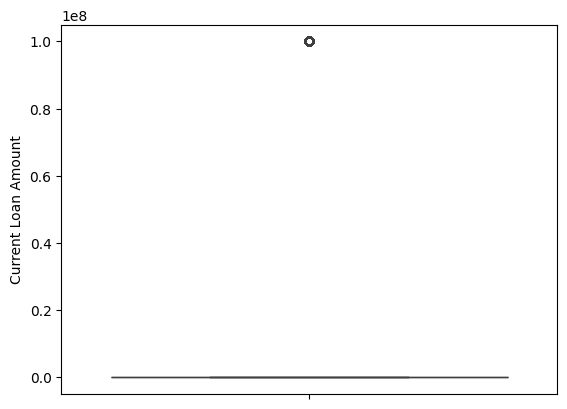

Credit Score


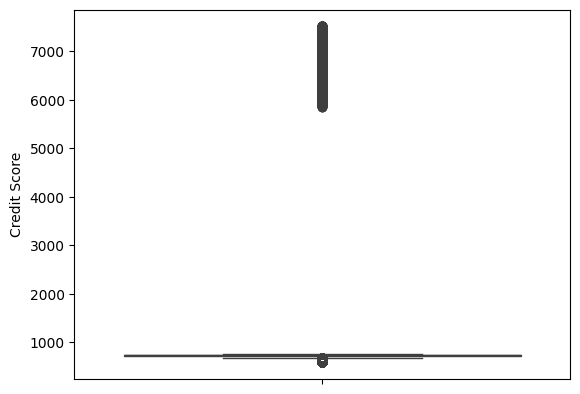

Monthly Debt


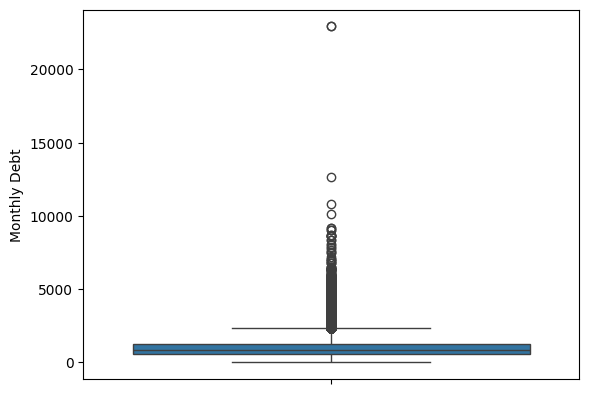

Years of Credit History


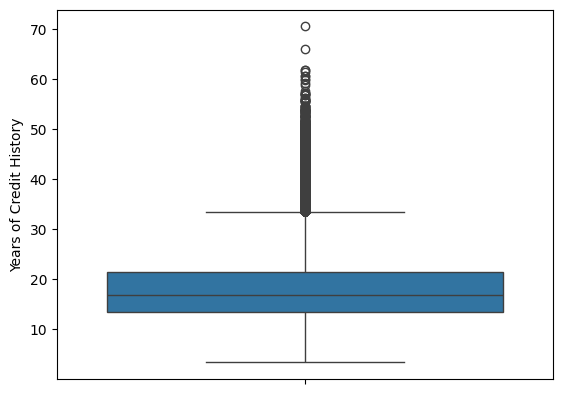

Number of Open Accounts


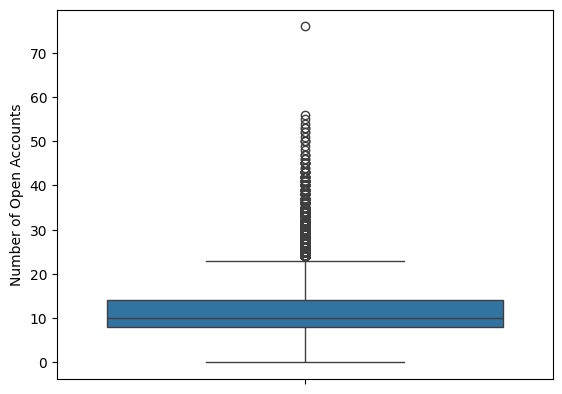

In [ ]:
for i in nums:
  print(i)
  sns.boxplot(nums[i], vert= True)
  plt.show()

In [ ]:
df.shape

(186096, 11)

In [ ]:
def analyze_numeric_columns(df, numeric_cols):
    for col in numeric_cols:
        print(f"\nAnalysis for column: {col}")

        # Calculate outliers using IQR
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1                # Interquartile Range (IQR)
        lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

        # Detect outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        value_to_check = upper_bound  # Using upper outlier bound as the value to check

        print(f"\nOutliers for {col} (values below {lower_bound:.2f} or above {upper_bound:.2f}):")
        print(outliers.head())  # Display top 5 outliers for brevity

        # Sort values in descending order
        print(f"\nSorted values of {col}:")
        print(df[col].sort_values(ascending=False).head())  # Display top 5 for brevity

        # Value counts
        print(f"\nValue counts of {col}:")
        print(df[col].value_counts().head())  # Display top 5 for brevity

        # remove the outliers
        df = df[df[col] <= upper_bound]
        df = df[df[col] >= lower_bound]
        df.head()

        # Box plot
        print(f"\nBox plot for {col}:")
        plt.boxplot(df[col].dropna())  # Drop NaNs for the plot
        plt.title(f'Boxplot of {col}')
        plt.show()


Analysis for column: Current Loan Amount

Outliers for Current Loan Amount (values below -9617.50 or above 37130.50):
236456    39304
Name: Current Loan Amount, dtype: int64

Sorted values of Current Loan Amount:
236456    39304
75775     35875
48503     35875
38070     35875
231439    35872
Name: Current Loan Amount, dtype: int64

Value counts of Current Loan Amount:
Current Loan Amount
9820     46
10192    42
9781     41
10132    40
10096    39
Name: count, dtype: int64

Box plot for Current Loan Amount:


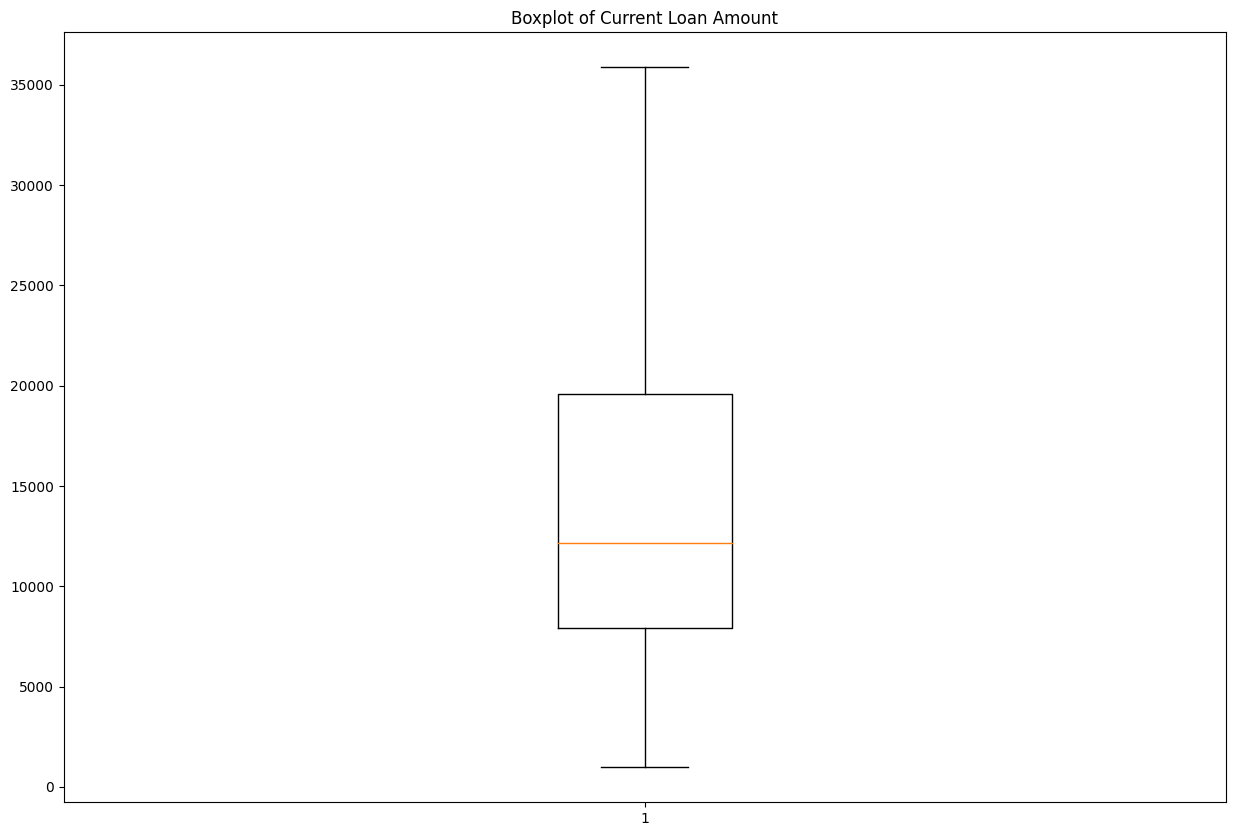


Analysis for column: Credit Score

Outliers for Credit Score (values below 666.50 or above 790.50):
6     6640.0
34     607.0
36     623.0
37     623.0
47     636.0
Name: Credit Score, dtype: float64

Sorted values of Credit Score:
196935    7510.0
171855    7510.0
48742     7510.0
160222    7510.0
224762    7510.0
Name: Credit Score, dtype: float64

Value counts of Credit Score:
Credit Score
747.0    4163
740.0    4143
741.0    4073
746.0    4017
742.0    3902
Name: count, dtype: int64

Box plot for Credit Score:


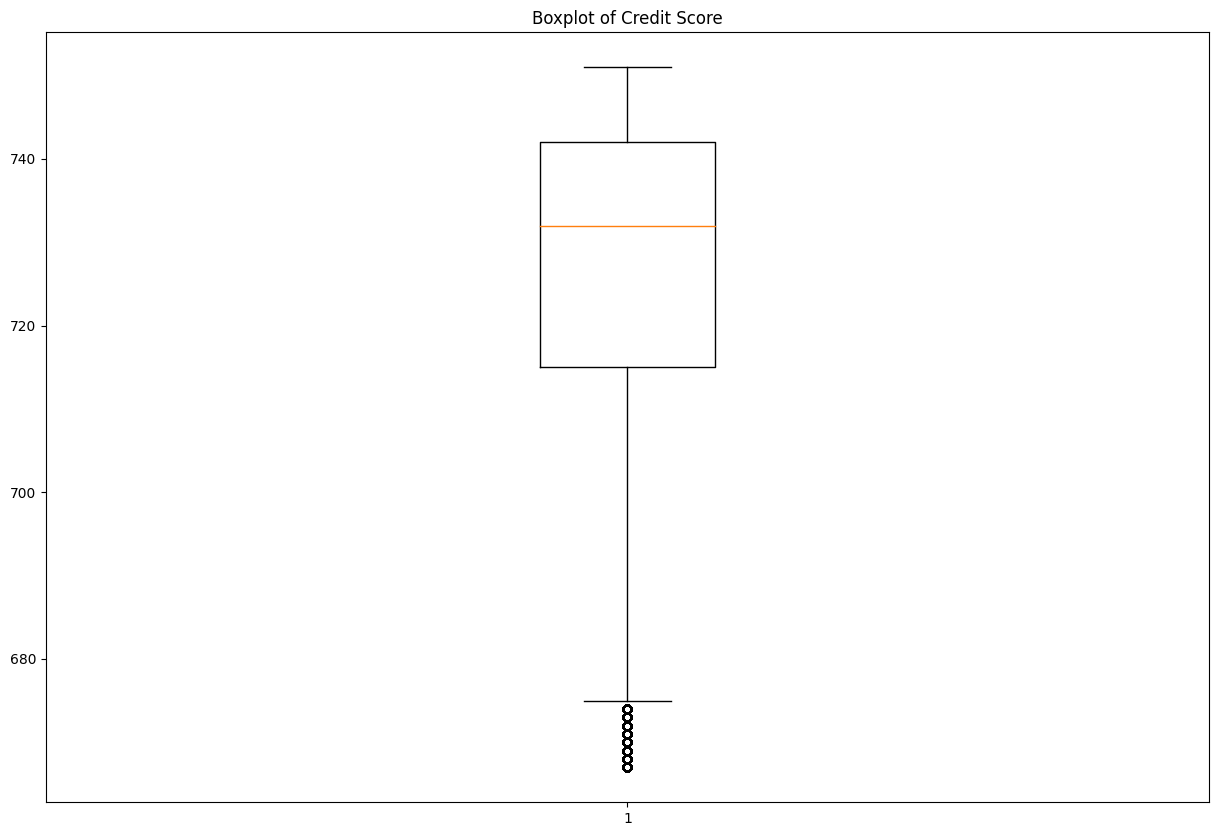


Analysis for column: Monthly Debt

Outliers for Monthly Debt (values below -530.91 or above 2316.98):
33     2627.76
127    2398.08
141    2501.01
155    3488.69
202    3086.76
Name: Monthly Debt, dtype: float64

Sorted values of Monthly Debt:
204834    22939.12
204833    22939.12
93584      9190.17
243629     9183.01
144022     9039.57
Name: Monthly Debt, dtype: float64

Value counts of Monthly Debt:
Monthly Debt
0.00      118
759.96      9
724.78      9
539.01      8
582.36      8
Name: count, dtype: int64

Box plot for Monthly Debt:


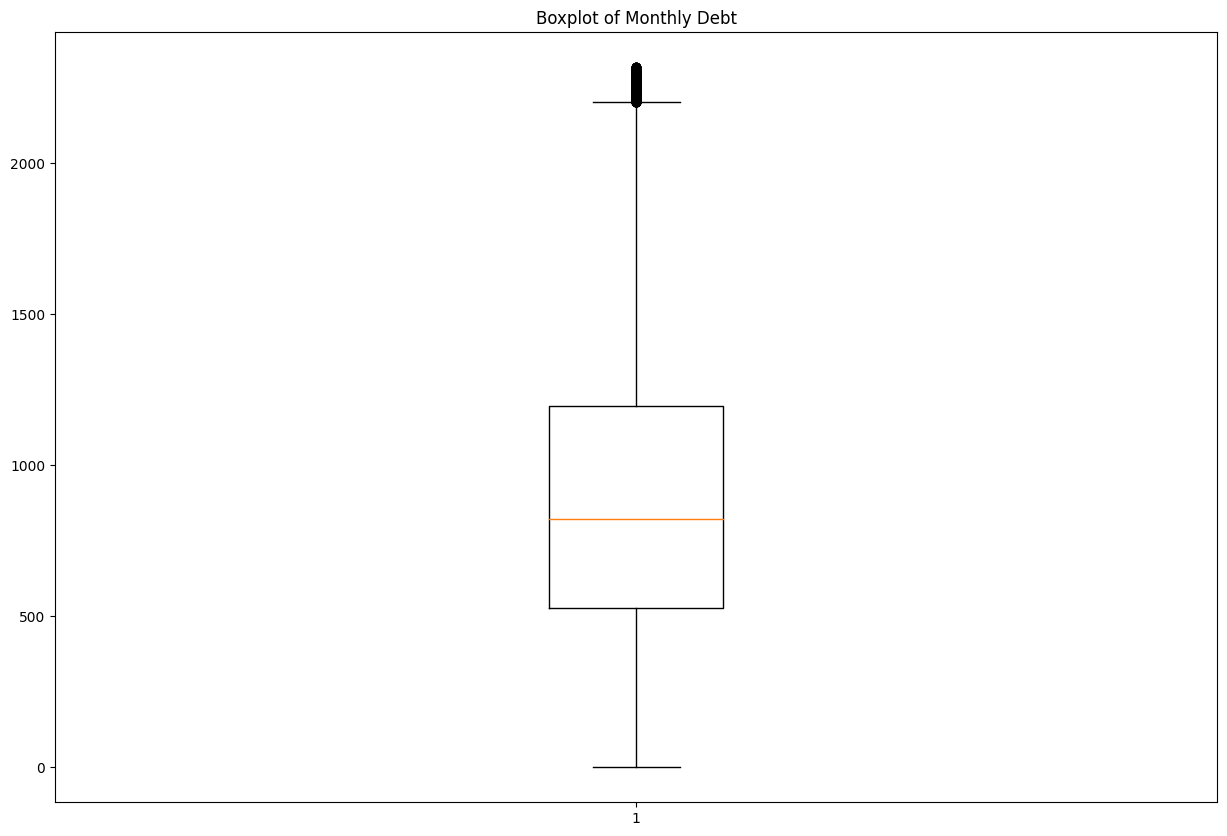


Analysis for column: Years of Credit History

Outliers for Years of Credit History (values below 1.40 or above 33.40):
159    38.3
164    38.5
194    35.6
244    38.3
500    34.9
Name: Years of Credit History, dtype: float64

Sorted values of Years of Credit History:
126392    70.5
227022    61.7
12694     60.5
12695     60.5
206312    59.9
Name: Years of Credit History, dtype: float64

Value counts of Years of Credit History:
Years of Credit History
16.0    1774
15.0    1622
17.0    1515
16.5    1497
15.4    1459
Name: count, dtype: int64

Box plot for Years of Credit History:


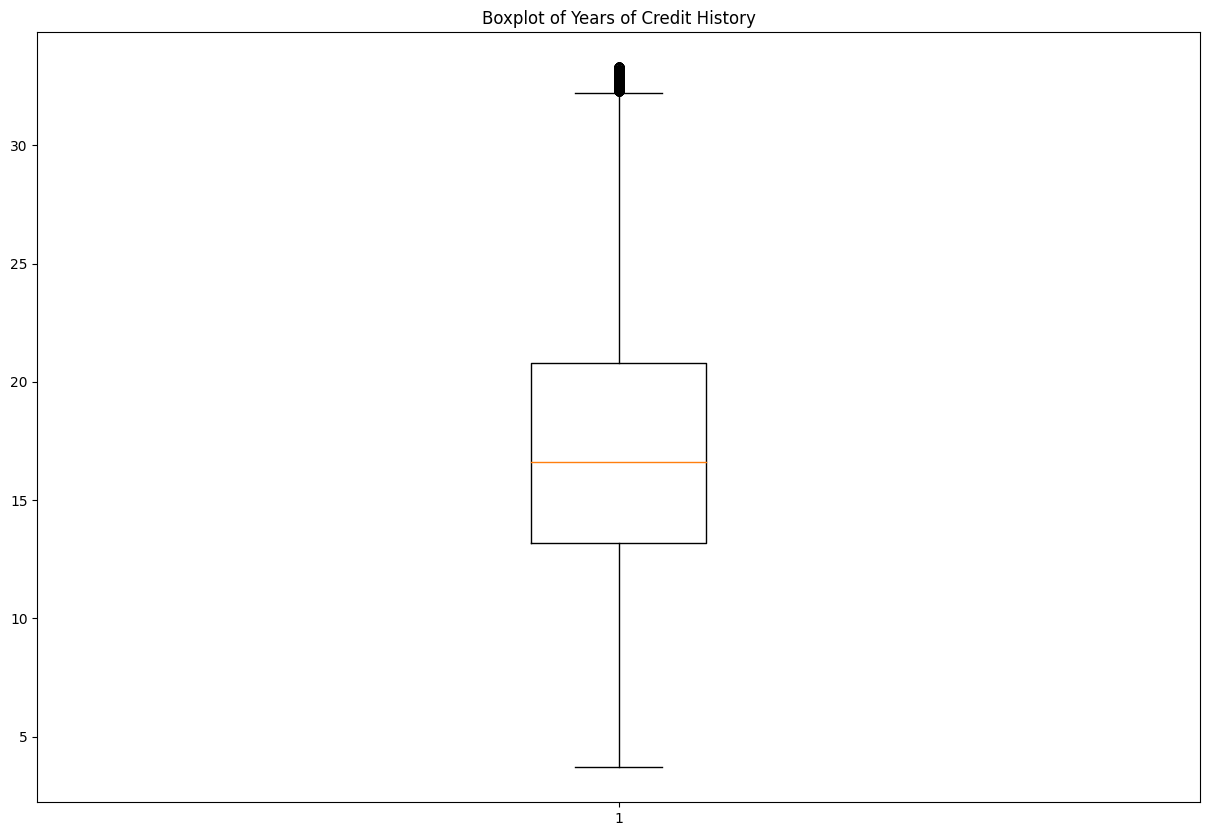


Analysis for column: Number of Open Accounts

Outliers for Number of Open Accounts (values below -2.00 or above 22.00):
44     34
391    23
499    35
531    28
564    31
Name: Number of Open Accounts, dtype: int64

Sorted values of Number of Open Accounts:
8843      76
25661     53
125724    52
235778    52
169844    51
Name: Number of Open Accounts, dtype: int64

Value counts of Number of Open Accounts:
Number of Open Accounts
9     11832
10    11333
8     11202
7     10274
11    10248
Name: count, dtype: int64

Box plot for Number of Open Accounts:


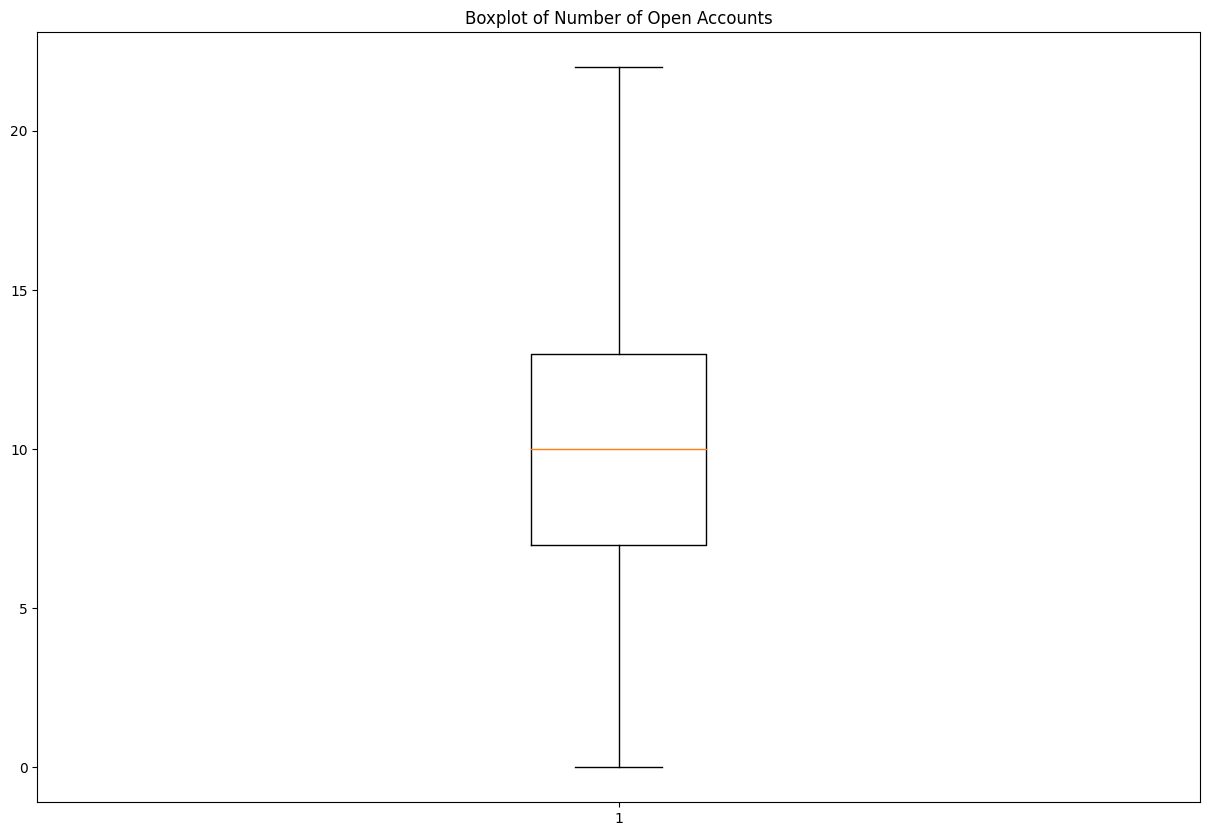

In [ ]:
analyze_numeric_columns(df, nums)

In [ ]:
df.shape

(152332, 11)

In [ ]:
df.isnull().sum()

,0
Current Loan Amount,0
Term,0
Credit Score,0
Years in current job,0
Home Ownership,0
Purpose,0
Monthly Debt,0
Years of Credit History,0
Number of Open Accounts,0
Tax Liens,0


#**UNIVARIATE ANALYSIS**

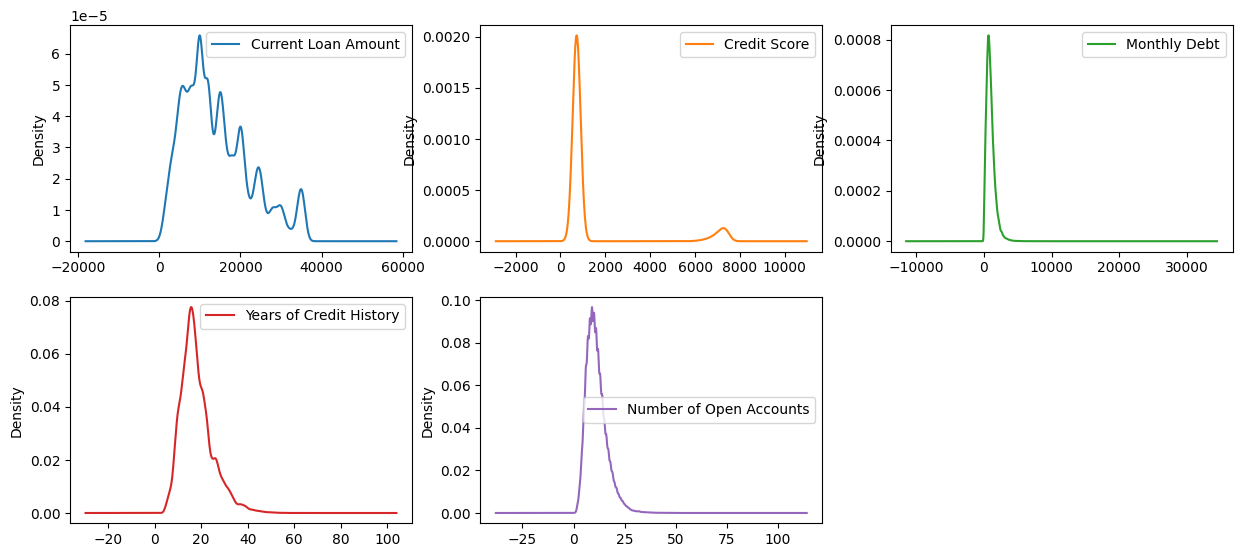

In [ ]:
plt.rcParams["figure.figsize"] = [15,10]
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

In [ ]:
nums = df.select_dtypes(include = 'number')
nums.head()

,Current Loan Amount,Credit Score,Monthly Debt,Years of Credit History,Number of Open Accounts
0,11520,741.0,584.03,12.3,10
1,3441,734.0,1106.04,26.3,17
2,21029,747.0,1321.85,28.8,5
3,18743,747.0,751.92,26.2,9
4,11731,746.0,355.18,11.5,12


In [ ]:
cats = df.select_dtypes(exclude = 'number')
cats.head()

,Term,Years in current job,Home Ownership,Purpose,Tax Liens,Loan Status
0,Short Term,10+ years,Home Mortgage,Debt Consolidation,0,Fully Paid
1,Short Term,4 years,Home Mortgage,other,0,Fully Paid
2,Short Term,10+ years,Home Mortgage,Debt Consolidation,0,Fully Paid
3,Short Term,10+ years,Own Home,Debt Consolidation,0,Fully Paid
4,Short Term,4 years,Rent,Debt Consolidation,0,Fully Paid


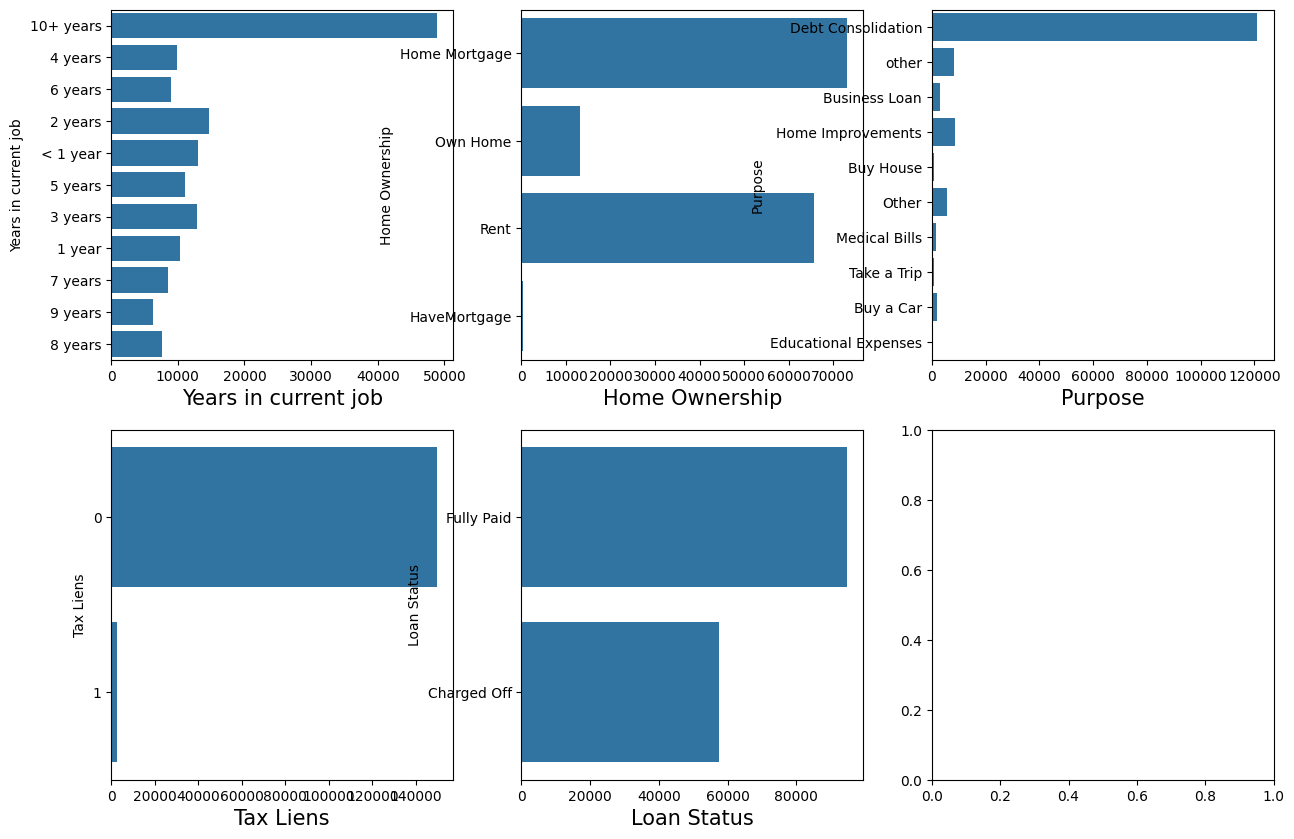

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
# use a for loop to plot the count plot for the categoric variable
for variable, subplot in zip(cats.columns[1:], ax.flatten()):
    z = sns.countplot(df[variable], ax=subplot)                       # plot the count plot
    z.set_xticklabels(z.get_xticklabels(),rotation='horizontal')      # rotate the on x-axis labels
    z.set_xlabel(variable, fontsize = 15)                             # set the size of x-axis labels

In [ ]:
correlation_matrix = nums.corr()
# Check the available columns in the correlation matrix
print(correlation_matrix.columns)
# Access the correct column name
loan_status_correlation = correlation_matrix['Current Loan Amount'] # Replace with actual column name
print(loan_status_correlation)


Index(['Current Loan Amount', 'Credit Score', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts'],
      dtype='object')
Current Loan Amount        1.000000
Credit Score               0.021671
Monthly Debt               0.429303
Years of Credit History    0.169206
Number of Open Accounts    0.195094
Name: Current Loan Amount, dtype: float64


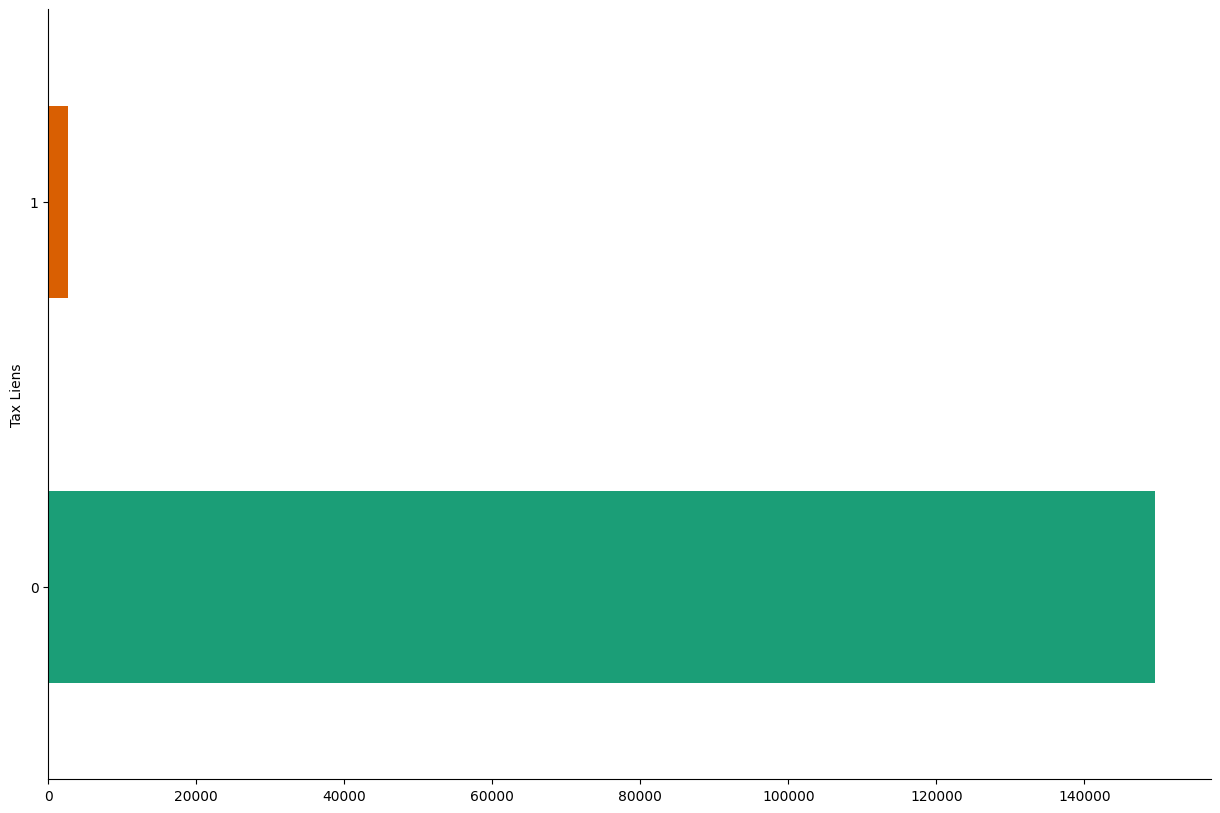

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Tax Liens').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

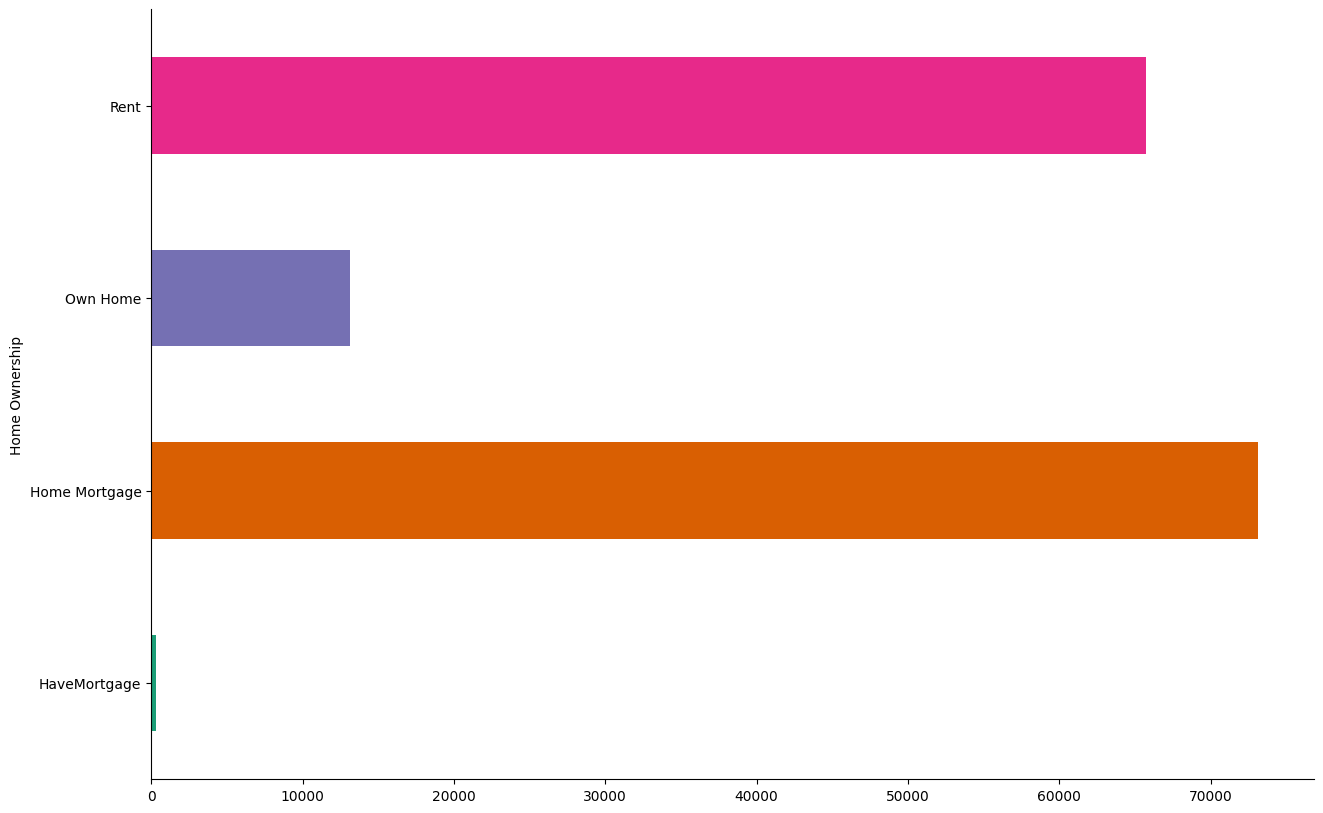

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Home Ownership').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

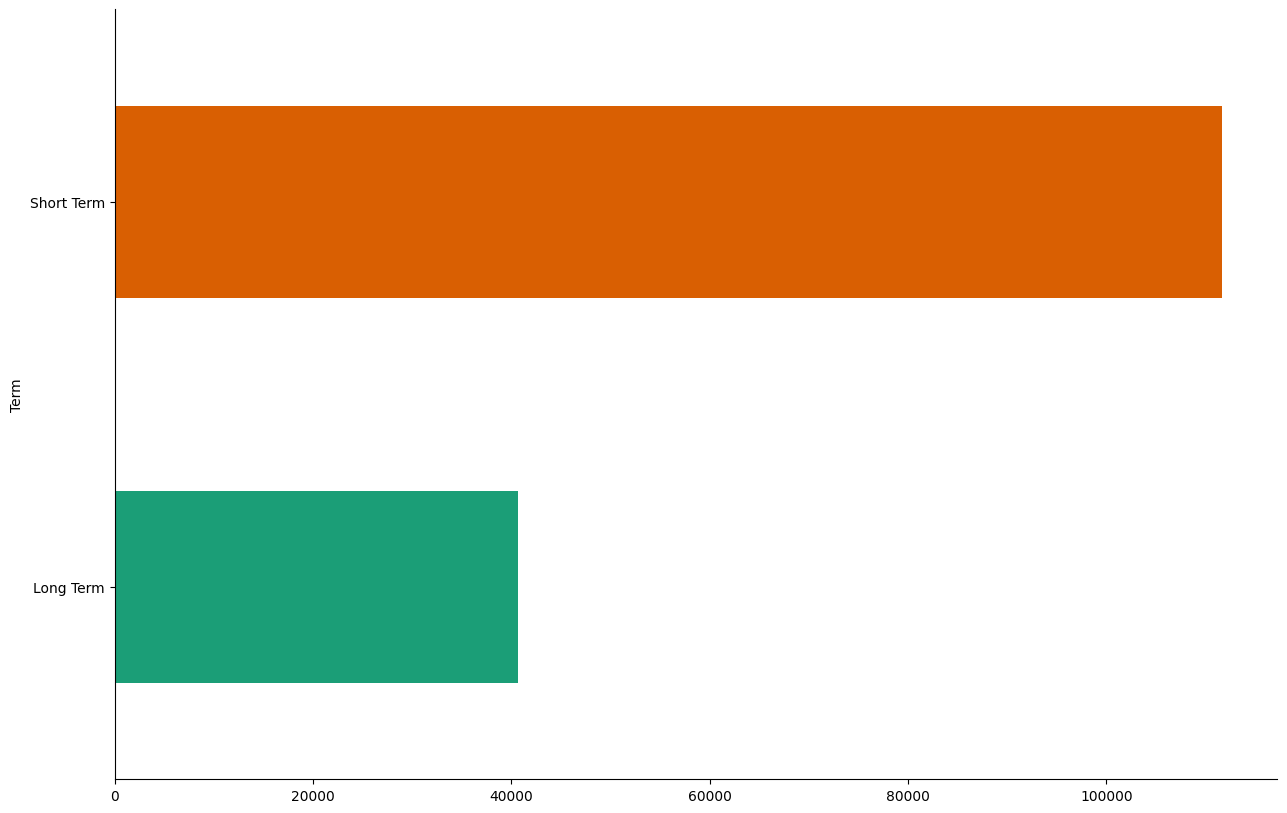

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Term').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

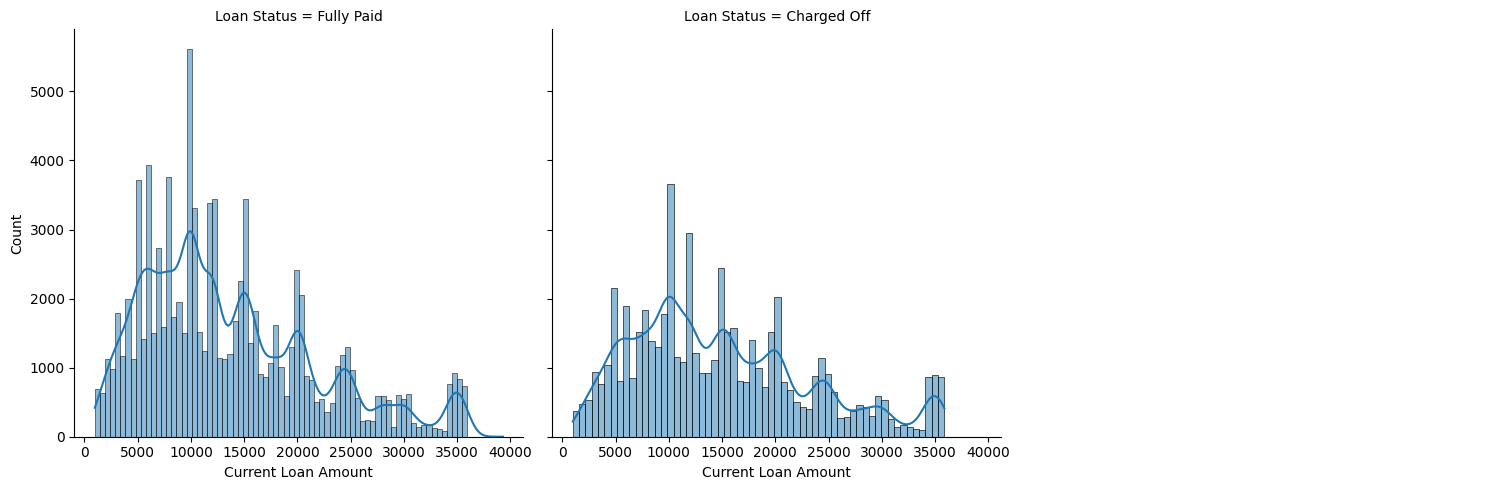

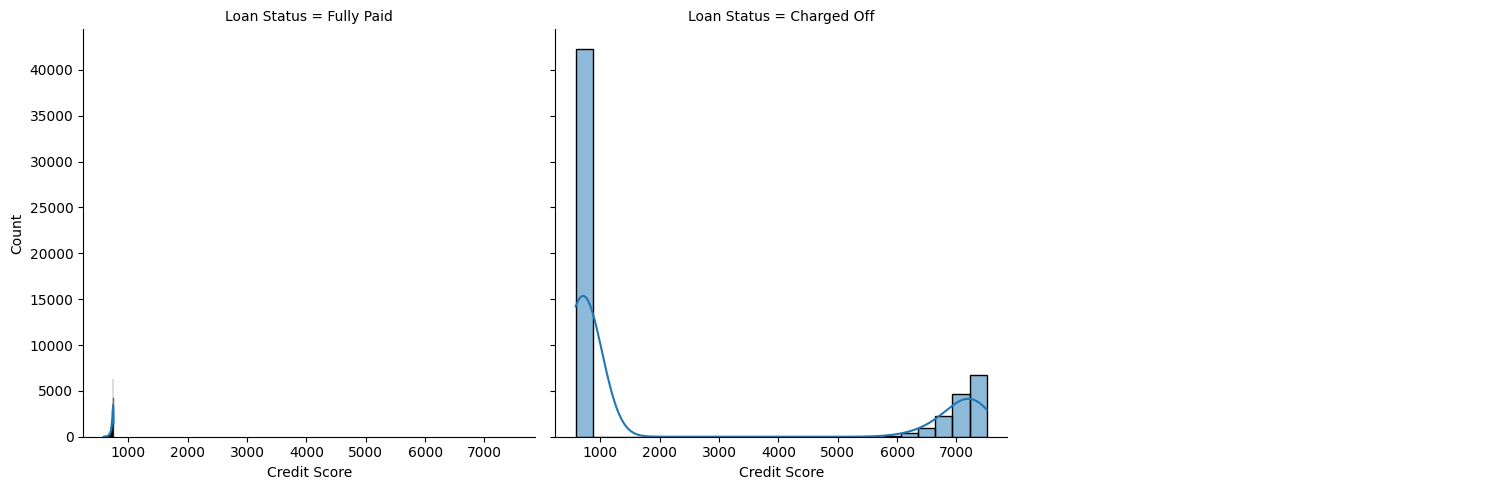

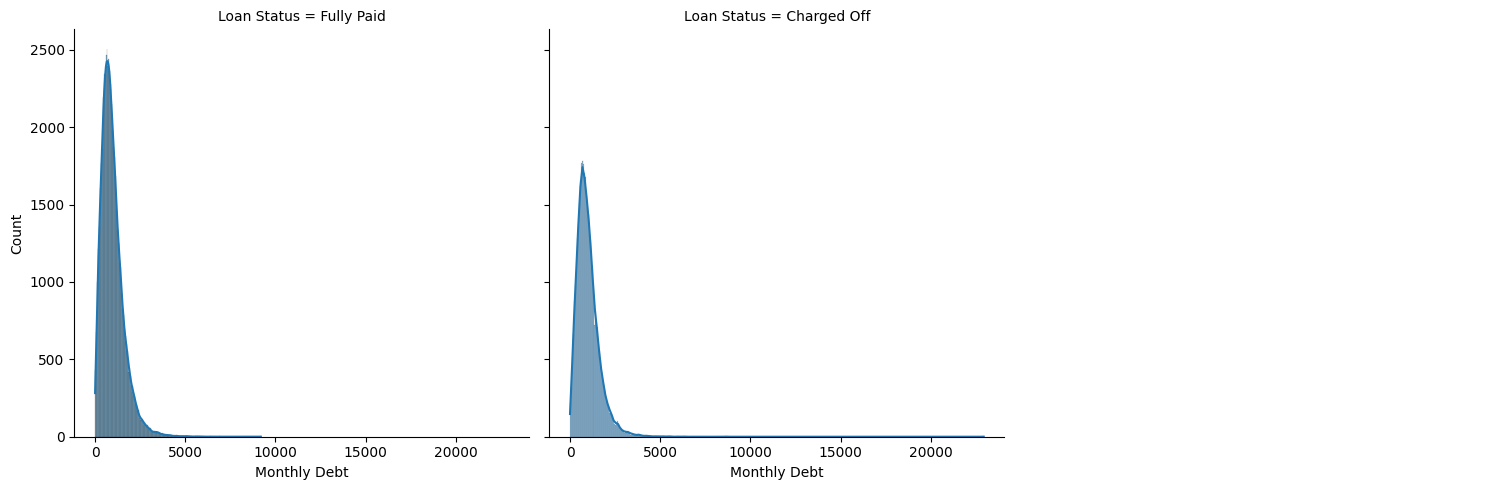

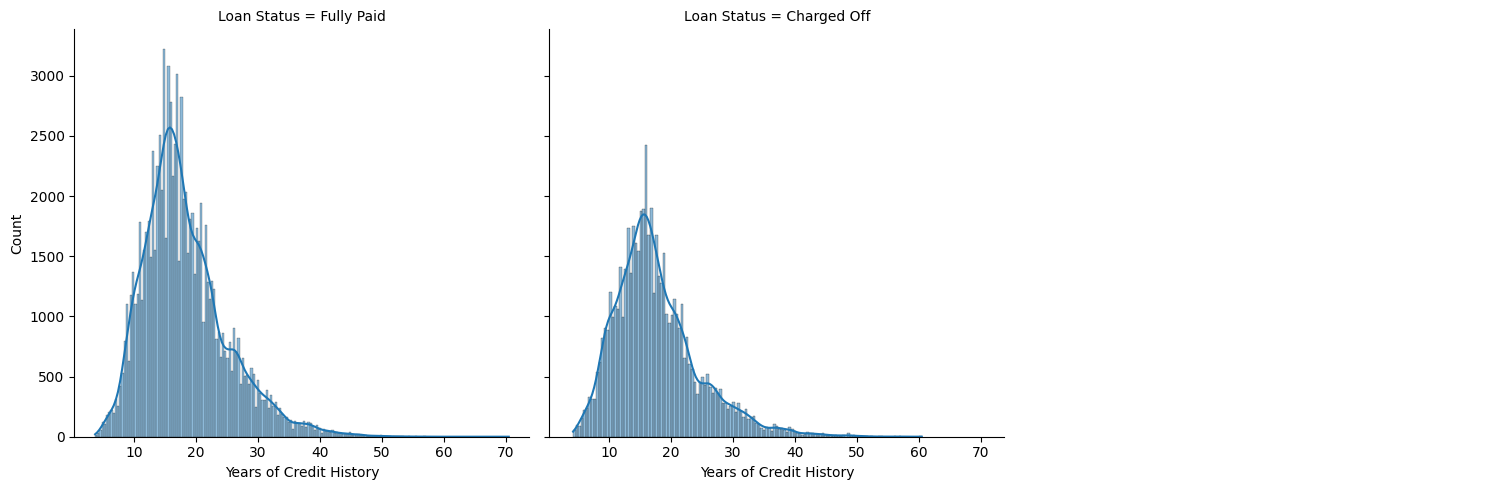

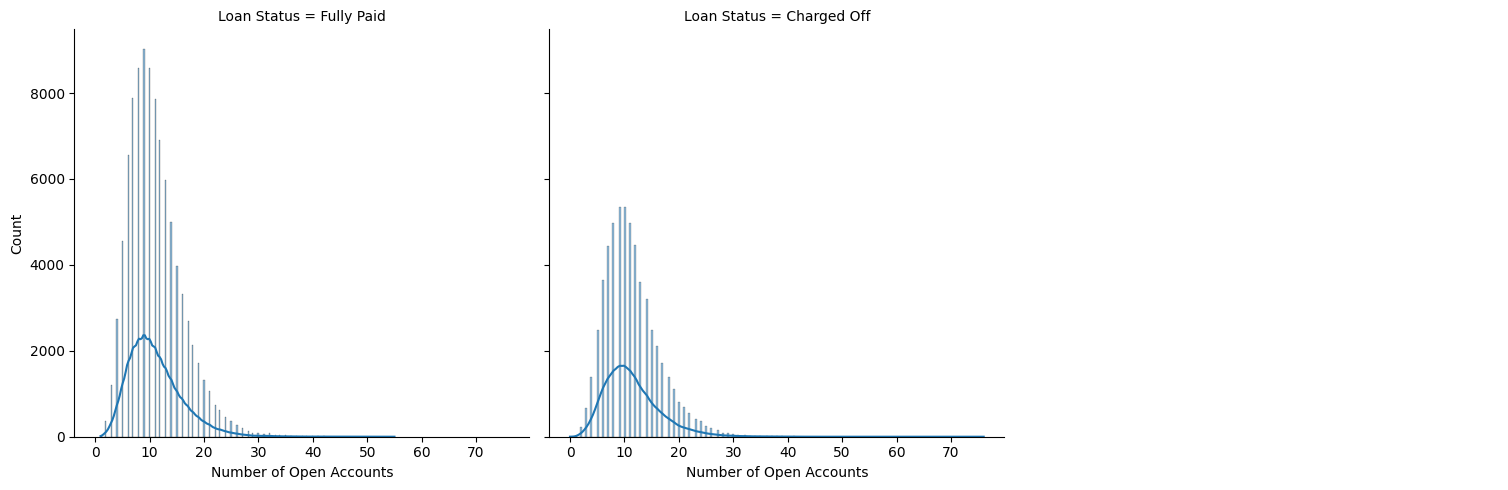

In [ ]:
for col in nums.columns:
  g = sns.FacetGrid(df, col='Loan Status', col_wrap=3, height=5)
  g.map(sns.histplot, col, kde=True) # Pass the column name to sns.histplot
  g.add_legend()
  plt.show()

#**BIVARIATE ANAYSIS**

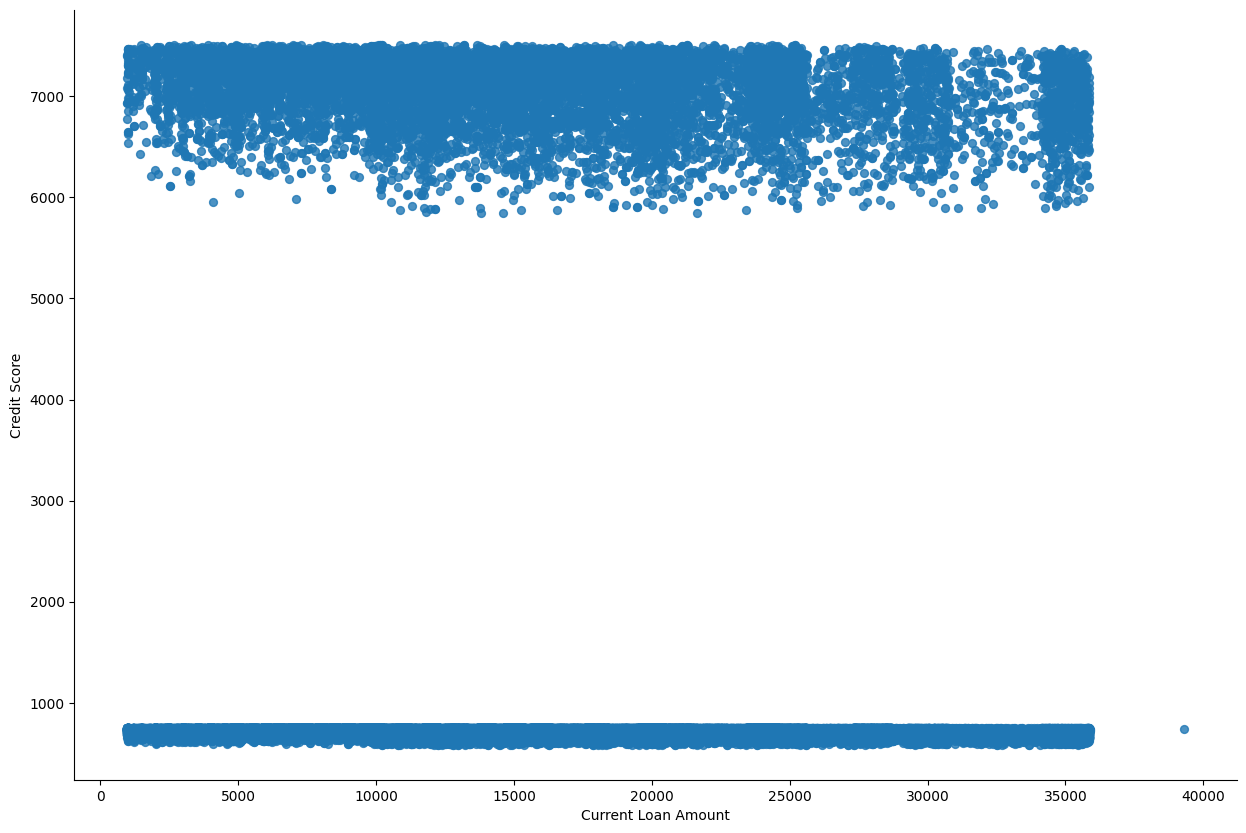

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Current Loan Amount', y='Credit Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

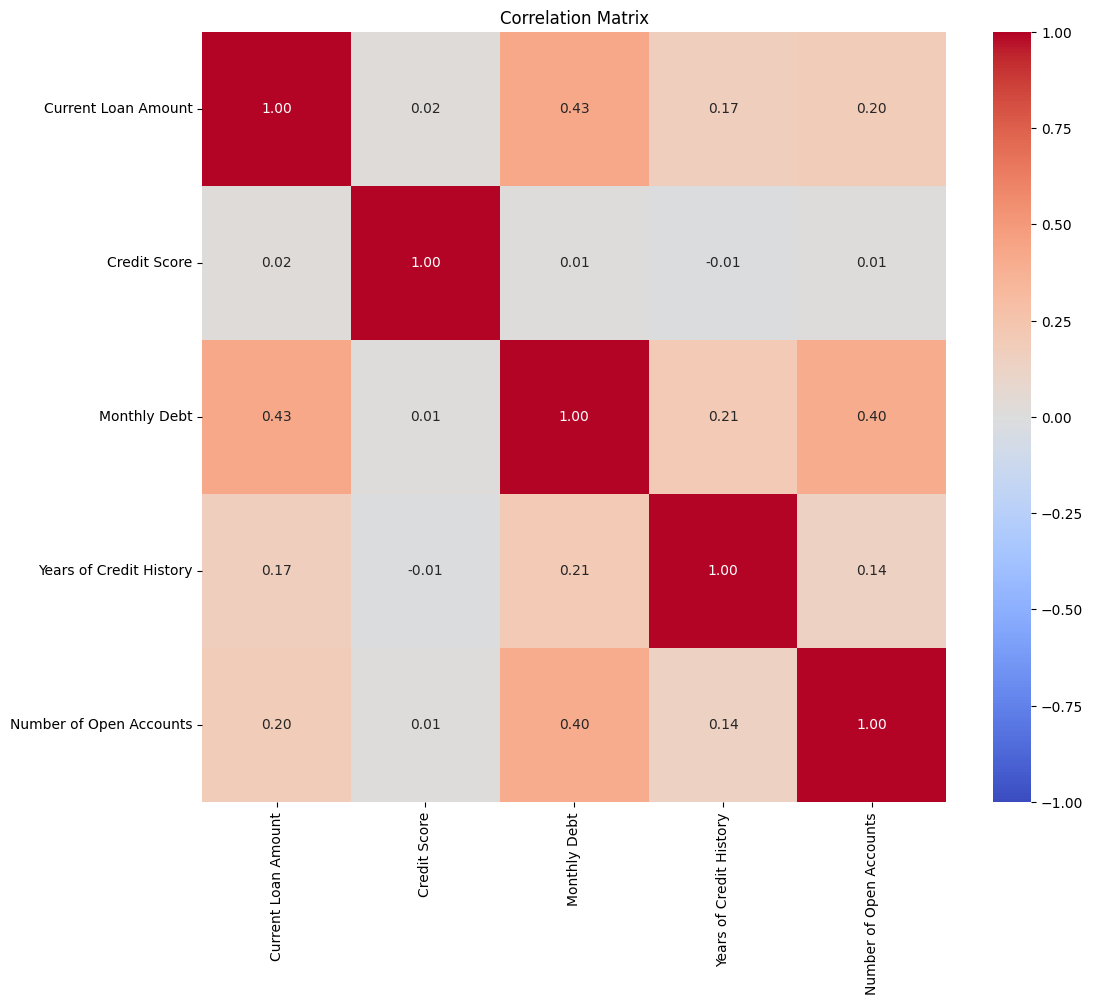

In [ ]:
correlation_matrix = nums.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#**SPLITTING X and Y**

In [ ]:
df

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Tax Liens,Loan Status
0,11520,Short Term,741.0,10+ years,Home Mortgage,Debt Consolidation,584.03,12.3,10,0,Fully Paid
1,3441,Short Term,734.0,4 years,Home Mortgage,other,1106.04,26.3,17,0,Fully Paid
2,21029,Short Term,747.0,10+ years,Home Mortgage,Debt Consolidation,1321.85,28.8,5,0,Fully Paid
3,18743,Short Term,747.0,10+ years,Own Home,Debt Consolidation,751.92,26.2,9,0,Fully Paid
4,11731,Short Term,746.0,4 years,Rent,Debt Consolidation,355.18,11.5,12,0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...
256978,11953,Short Term,717.0,10+ years,Home Mortgage,Debt Consolidation,982.82,11.7,9,0,Charged Off
256980,5078,Short Term,737.0,10+ years,Own Home,Debt Consolidation,1376.47,19.1,9,0,Fully Paid
256981,12116,Short Term,7460.0,9 years,Home Mortgage,Debt Consolidation,297.96,15.1,8,0,Charged Off
256982,12116,Short Term,746.0,9 years,Home Mortgage,Debt Consolidation,297.96,15.1,8,0,Charged Off


In [ ]:
X = df.iloc[:,:-1]

In [ ]:
y = df.iloc[:,-1]

In [ ]:
X

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Tax Liens
0,11520,Short Term,741.0,10+ years,Home Mortgage,Debt Consolidation,584.03,12.3,10,0
1,3441,Short Term,734.0,4 years,Home Mortgage,other,1106.04,26.3,17,0
2,21029,Short Term,747.0,10+ years,Home Mortgage,Debt Consolidation,1321.85,28.8,5,0
3,18743,Short Term,747.0,10+ years,Own Home,Debt Consolidation,751.92,26.2,9,0
4,11731,Short Term,746.0,4 years,Rent,Debt Consolidation,355.18,11.5,12,0
...,...,...,...,...,...,...,...,...,...,...
256978,11953,Short Term,717.0,10+ years,Home Mortgage,Debt Consolidation,982.82,11.7,9,0
256980,5078,Short Term,737.0,10+ years,Own Home,Debt Consolidation,1376.47,19.1,9,0
256981,12116,Short Term,7460.0,9 years,Home Mortgage,Debt Consolidation,297.96,15.1,8,0
256982,12116,Short Term,746.0,9 years,Home Mortgage,Debt Consolidation,297.96,15.1,8,0


In [ ]:
y

,Loan Status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Fully Paid
...,...
256978,Charged Off
256980,Fully Paid
256981,Charged Off
256982,Charged Off


#**ENCODING**

In [274]:
cats = X.select_dtypes(exclude = 'number')
encoded = pd.get_dummies(X,columns=cats.columns.tolist(),drop_first=True)
encoded

,Current Loan Amount,Credit Score,Monthly Debt,Years of Credit History,Number of Open Accounts,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,...,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other,Tax Liens_1
0,11520,741.0,584.03,12.3,10,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,3441,734.0,1106.04,26.3,17,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,21029,747.0,1321.85,28.8,5,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,18743,747.0,751.92,26.2,9,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,11731,746.0,355.18,11.5,12,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256978,11953,717.0,982.82,11.7,9,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
256980,5078,737.0,1376.47,19.1,9,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
256981,12116,7460.0,297.96,15.1,8,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
256982,12116,746.0,297.96,15.1,8,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [276]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 1])

#Train-Test Split

In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded, y, test_size=0.2, random_state=42)